In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt

In [ ]:
X, y = make_classification(n_samples=10000, n_features=50, n_informative=25, n_redundant=25, weights=[0.5], random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
prob_pos = clf.predict_proba(X_test)[:, 1]
brier_before = brier_score_loss(y_test, prob_pos)
print(f"Brier score loss before calibration: {brier_before:.4f}")

Brier score loss before calibration: 0.0728


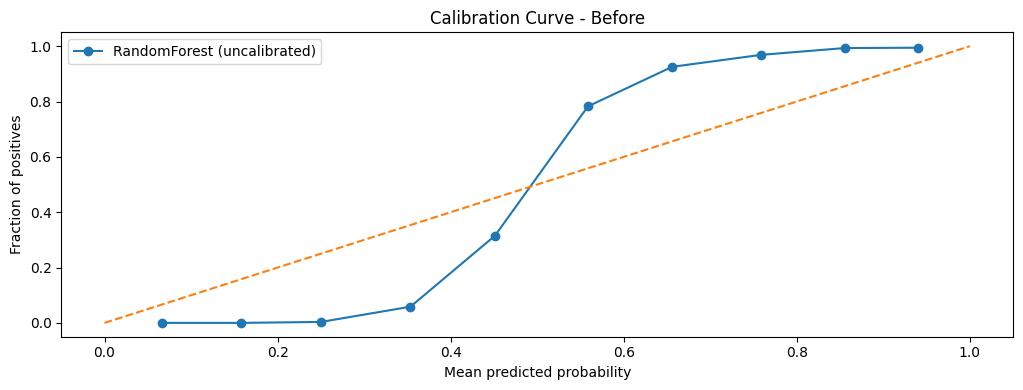

In [ ]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)

prob_true, prob_pred = calibration_curve(y_test, prob_pos, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='RandomForest (uncalibrated)')

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve - Before')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
calibrated_clf = CalibratedClassifierCV(clf, method='sigmoid', cv='prefit')
calibrated_clf.fit(X_train, y_train)

CalibratedClassifierCV(cv='prefit',
                       estimator=RandomForestClassifier(random_state=42))

In [ ]:
prob_pos_calibrated = calibrated_clf.predict_proba(X_test)[:, 1]
brier_after = brier_score_loss(y_test, prob_pos_calibrated)
print(f"Brier score loss after calibration: {brier_after:.4f}")

Brier score loss after calibration: 0.0342


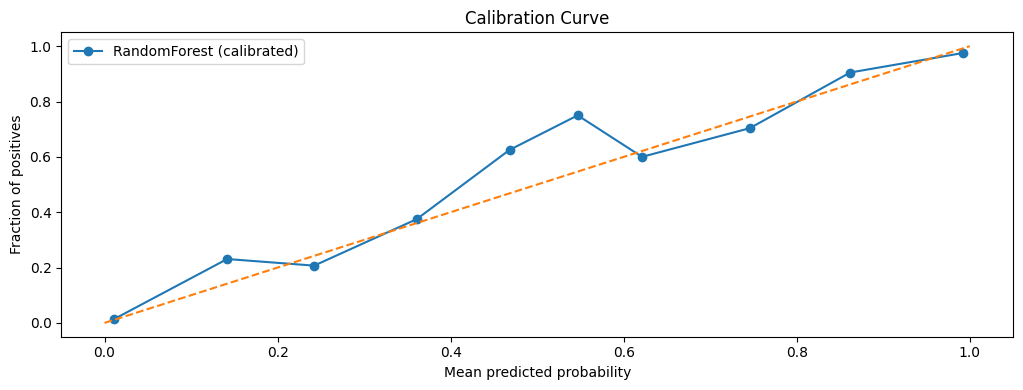

In [ ]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)

prob_true_cal, prob_pred_cal = calibration_curve(y_test, prob_pos_calibrated, n_bins=10)
plt.plot(prob_pred_cal, prob_true_cal, marker='o', label='RandomForest (calibrated)')

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend()
plt.tight_layout()
plt.show()

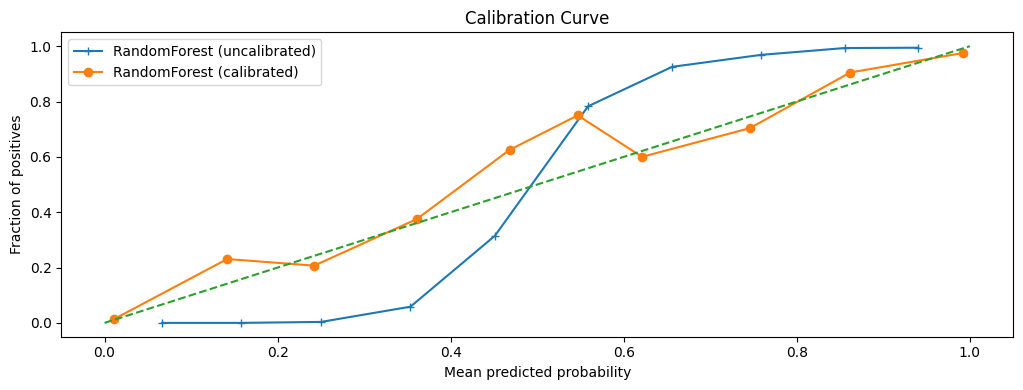

In [ ]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)

prob_true, prob_pred = calibration_curve(y_test, prob_pos, n_bins=10)
plt.plot(prob_pred, prob_true, marker='+', label='RandomForest (uncalibrated)')

prob_true_cal, prob_pred_cal = calibration_curve(y_test, prob_pos_calibrated, n_bins=10)
plt.plot(prob_pred_cal, prob_true_cal, marker='o', label='RandomForest (calibrated)')

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend()
plt.tight_layout()
plt.show()